In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fraction(X, u, mu):
    if np.isinf(mu):  # u/mu = 0
        return 1

    if any(X < 0):
        return None
    elif any(X < u):
        return 0
    elif all(X >= u):
        return np.exp(len(X) * u / mu)
    else:
        raise TypeError("Maths is broken")


@np.vectorize(signature="(m),(),(),()->()")
def observer(X, u, mu, L_bound):
    L = fraction(X, u, mu)

    return L > L_bound

In [3]:
u = 1
N = int(1e3)

u_mu = np.linspace(0, 3)

L_bound = [0, 0.5, 1, 2.5]

In [4]:
def compute(n):
    rng = np.random.default_rng()

    Dss = []
    alphass = []

    for _u_mu in u_mu:
        mu = u / _u_mu

        X_H1 = u + rng.exponential(mu, (N, n))
        X_H0 = rng.exponential(mu, (N, n))

        Ds = []
        alphas = []

        for _L_bound in L_bound:
            D = sum(observer(X_H1, u, mu, _L_bound)) / len(X_H1)
            Ds.append(D)

            alpha = sum(observer(X_H0, u, mu, _L_bound)) / len(X_H0)
            alphas.append(alpha)

        Dss.append(Ds)
        alphass.append(alphas)

    return Dss, alphass

In [5]:
def plot_aD(Ds, alphas, n):
    fig, axs = plt.subplots(1, 2, sharey=True)

    fig.suptitle(f"$n = {n}$")

    for ax in axs:
        ax.scatter(alphas, Ds, c=np.repeat(u_mu,len(L_bound)), alpha=0.2)
        if ax is axs[1]:
            ax.set_xscale("log")
        ax.set_xlabel(r"$\alpha$")
        if ax is axs[0]:
            ax.set_ylabel("$D$")
        ax.grid(which="both")

    fig.tight_layout()
    
    fig.savefig(f"pics/aD_{n}.png")

In [6]:
def plot_umu(Y, ylabel, n):
    plt.figure()
    plt.title(f"$n = {n}$")

    for D, _L_boud in zip(np.array(Y).T, L_bound):
        plt.plot(u_mu, D, label=f"$L_{{пор}} = {np.round(_L_boud, 3)}$")

    plt.legend()

    plt.grid()
    plt.xlabel(r"$\dfrac{u}{\mu}$")
    plt.ylabel(ylabel)
    
    plt.savefig(f"pics/umu_{ylabel.strip("$\\")}_{n}.png")

/tmp/ipykernel_99284/1482108988.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  mu = u / _u_mu


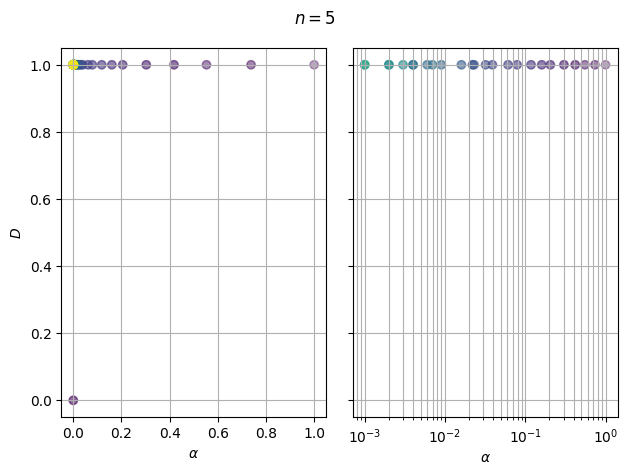

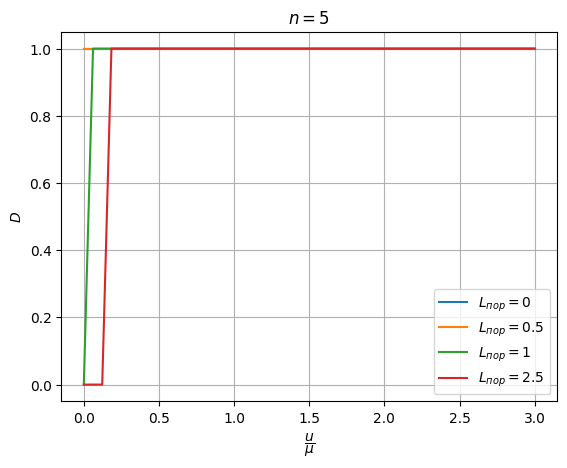

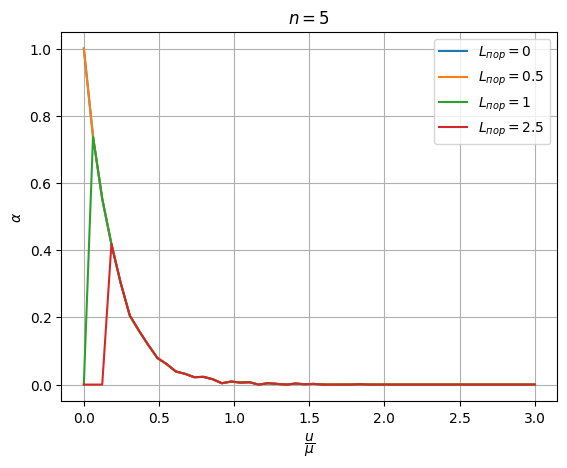

In [7]:
Ds, alphas = compute(5)
plot_aD(Ds, alphas, 5)
plot_umu(Ds, "$D$", 5)
plot_umu(alphas, r"$\alpha$", 5)

/tmp/ipykernel_99284/1482108988.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  mu = u / _u_mu


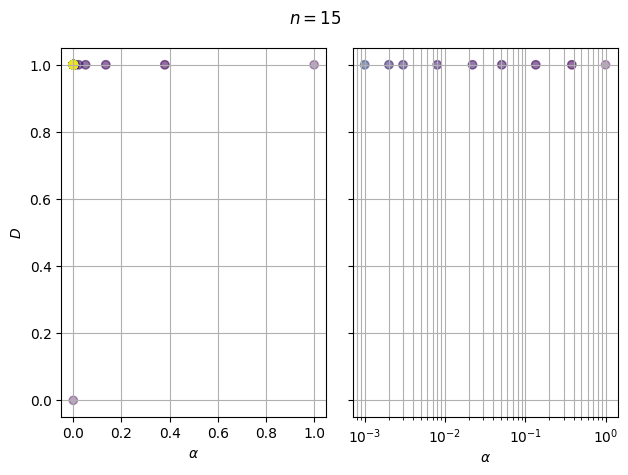

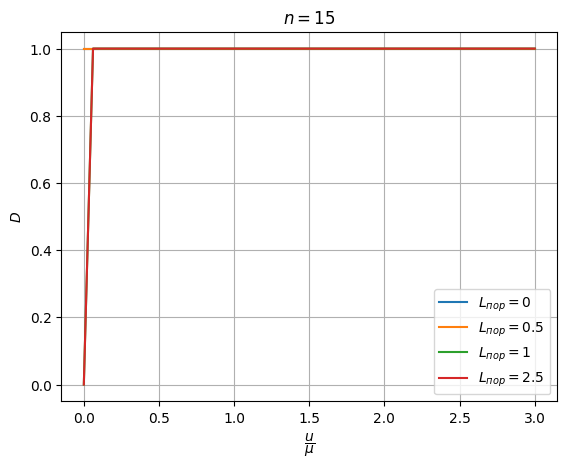

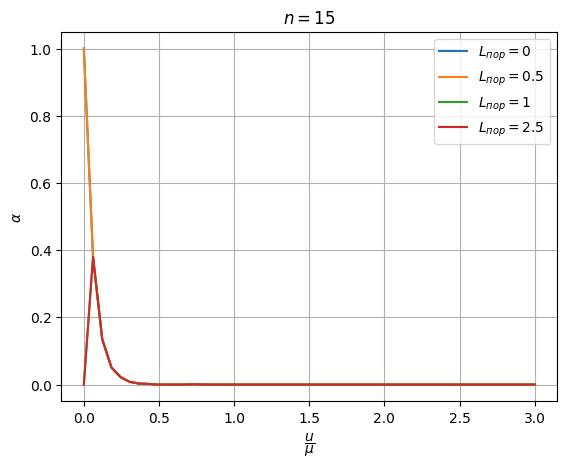

In [8]:
Ds, alphas = compute(15)
plot_aD(Ds, alphas, 15)
plot_umu(Ds, "$D$", 15)
plot_umu(alphas, r"$\alpha$", 15)